# YuGiOh

# DA SISTEMARE TUTTI I COLORI

## Dataset

### Creazione del dataset

Il dataset che viene utilizzato in questo notebook viene creato dal file `setup.py`, che va a fare delle richieste HTTP ad una [API](https://ygoprodeck.com/api-guide/) per ricavare i seguenti campi:
* nome [`NAME`]
* tipo [`TYPE`]
* attributo [`ATTRIBUTE`]
* razza [`RACE`]
* livello [`LEVEL`]
* attacco [`ATK`]
* difesa [`DEF`]
* prezzo su Cardmarket [`CARDMARKET_PRICE`]
* prezzo su TcgPlayer [`TCGPLAYER_PRICE`]
* prezzo su Ebay [`EBAY_PRICE`]
* prezzo su Amazon [`AMAZON_PRICE`]
* prezzo su CoolStuffINC [`COOLSTUFFINC_PRICE`]

In [145]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

with open("../dataset.csv", "r") as f:
    data = pd.read_csv(f, delimiter=";", decimal=".")

len(data)

12612

Il dataset contiene $12612$ record, ognuno con i $12$ campi sopra descritti, anche se molte carte hanno dei valori `NaN`: questo é dato dal fatto che le carte sono molto varie e, ad esempio, una carta `Mostro` possiede la caratteristica di attacco che invece una carta `Magia` non ha

### Tipi di carte

Andiamo ad analizzare i vari tipi di carte che andiamo a trovare all'interno del gioco

In [146]:
card_type = data["TYPE"].unique()
len(card_type), card_type

(28,
 array(['Spell Card', 'Effect Monster', 'Normal Monster',
        'Flip Effect Monster', 'Trap Card', 'Union Effect Monster',
        'Fusion Monster', 'Pendulum Effect Monster', 'Link Monster',
        'XYZ Monster', 'Synchro Monster', 'Synchro Tuner Monster',
        'Tuner Monster', 'Gemini Monster', 'Normal Tuner Monster',
        'Spirit Monster', 'Ritual Effect Monster', 'Skill Card', 'Token',
        'Pendulum Effect Fusion Monster', 'Ritual Monster', 'Toon Monster',
        'Pendulum Normal Monster', 'Synchro Pendulum Effect Monster',
        'Pendulum Tuner Effect Monster', 'XYZ Pendulum Effect Monster',
        'Pendulum Effect Ritual Monster', 'Pendulum Flip Effect Monster'],
       dtype=object))

Vediamo il numero di carte che sono state rilasciate per tipo

In [147]:
count = data["TYPE"].value_counts()
count

TYPE
Effect Monster                     4513
Spell Card                         2432
Trap Card                          1844
Normal Monster                      657
XYZ Monster                         488
Fusion Monster                      438
Tuner Monster                       434
Synchro Monster                     399
Link Monster                        378
Pendulum Effect Monster             254
Flip Effect Monster                 178
Skill Card                          124
Ritual Effect Monster               111
Token                               107
Gemini Monster                       45
Pendulum Normal Monster              40
Union Effect Monster                 36
Spirit Monster                       33
Synchro Tuner Monster                23
Toon Monster                         17
Ritual Monster                       15
Normal Tuner Monster                 10
Pendulum Effect Fusion Monster       10
XYZ Pendulum Effect Monster           9
Pendulum Tuner Effect Monster      

Notiamo come le prime $4$ posizioni sono presenti le $4$ carte che hanno dominato il gioco dalla sua nascita:
* carte mostro con effetto
* carte magia
* carte trappola
* carte mostro normali

Con il tempo sono state introdotte sempre più carte, ma vista la tardiva introduzione le troviamo nelle posizioni più basse della "classifica"

Andiamo a considerare solo i tipi che hanno almeno $100$ carte per avere un grafico più chiaro e leggibile

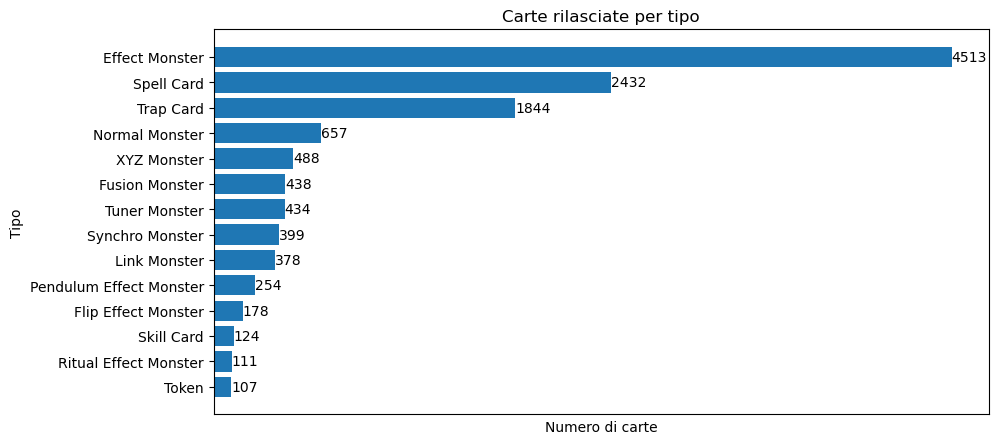

In [148]:
count = count.sort_values(ascending=True)
axis = list(filter(lambda t : t[0] >= 100, list(zip(count.values,count.index))))
x = [t[0] for t in axis]
y = [t[1] for t in axis]
plt.title("Carte rilasciate per tipo")
plt.xlabel("Numero di carte")
plt.ylabel("Tipo")
plt.xticks([])
bar = plt.barh(y,x)
plt.bar_label(bar)
plt.gcf().set_size_inches(10,5)
plt.show()
#plt.savefig("type.png", dpi=300, bbox_inches='tight', transparent=True)

Infine raggruppiamo questi $28$ tipi in $3$ grandi categorie:
* carte mostro
* carte magia e trappola
* token e carte skill

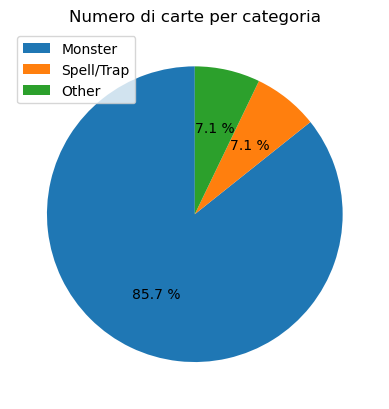

In [149]:
monster = [t for t in card_type if "Monster" in t]
spelltrap = [t for t in card_type if "Trap" in t or "Spell" in t]
other = [t for t in card_type if t not in monster and t not in spelltrap]

plt.title("Numero di carte per categoria")
y,label = [len(monster),len(spelltrap),len(other)],["Monster","Spell/Trap","Other"]
plt.pie(y, startangle=90, autopct="%.1f %%")
plt.legend(label)
plt.show()
#plt.savefig("pie.png", dpi=300, bbox_inches='tight', transparent=True)

### Razza e attributo

Due caratteristiche che usiamo per suddividere le carte sono il campo `RACE` e il campo `ATTRIBUTE`

La prima delle due rappresenta quello che la carta è nello specifico, ad esempio `beast`, `insect` o `machine`, mentre la seconda rappresenta categorie più astratte e generiche, come ad esempio `EARTH`, `WATER` o `FIRE`

#### Razza

DA FARE

In [ ]:
data["RACE"].value_counts()

#### Attributo

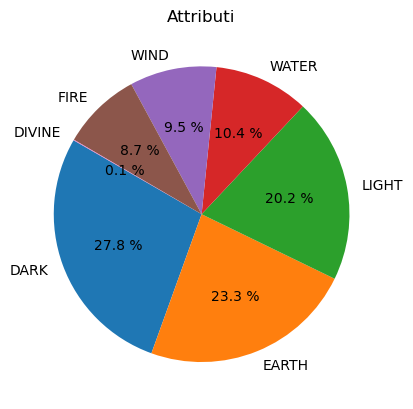

In [196]:
attribute = data["ATTRIBUTE"].value_counts()

plt.title("Attributi")
attribute.plot.pie(startangle=150, autopct="%.1f %%")
plt.ylabel("")
plt.show()
#plt.savefig("pie.png", dpi=300, bbox_inches='tight', transparent=True)

### Livello

Il livello di una carta definisce spesso quanto questa carta è forte, in termini di attacco, difesa o offetto al quale esso è collegato, ma siamo sicuri che sia sempre così?

#### Livello e attacco

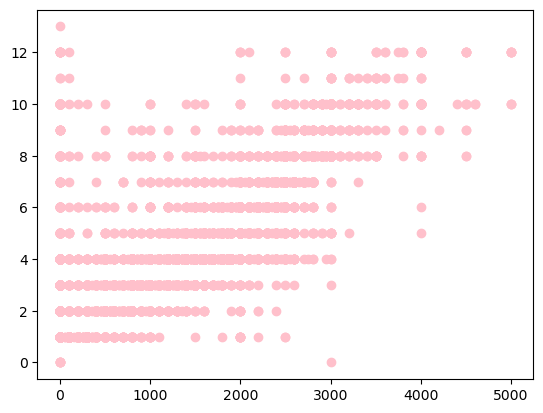

Indice di correlazione: 0.7233701304400515


In [176]:
plt.scatter(data["ATK"], data["LEVEL"], color='pink')
plt.show()
#plt.savefig("scatter_atk.png", dpi=300, bbox_inches='tight', transparent=True)

print(f"Indice di correlazione: {data['ATK'].corr(data['LEVEL'])}")

#### Livello e difesa

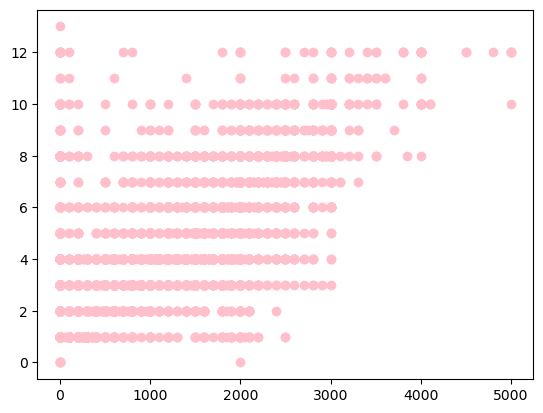

Indice di correlazione: 0.5798261405439517


In [177]:
plt.scatter(data["DEF"], data["LEVEL"],color='pink')
#plt.savefig("scatter_def.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

print(f"Indice di correlazione: {data['DEF'].corr(data['LEVEL'])}")

#### Conclusioni

Notiamo come nella relazione `LEVEL-ATK` abbiamo un indice di correlazione discreto, poco oltre il valore $0.72$, quindi potrebbe esserci una sorta di relazione diretta tra il livello di una carta e il suo valore corrispondente di attacco

Diverso il discorso invece per la relazione `LEVEL-DEF`, dove abbiamo un valore sotto la soglia della sufficienza, che ci dà poche informazioni sul tipo di relazione tra questi due campi

### Attacco

Lo abbiamo citato poco fa: l'attacco è una componente fondamentale delle carte mostro poichè è con questa statistica che i mostri si combattono e decretano il vincitore

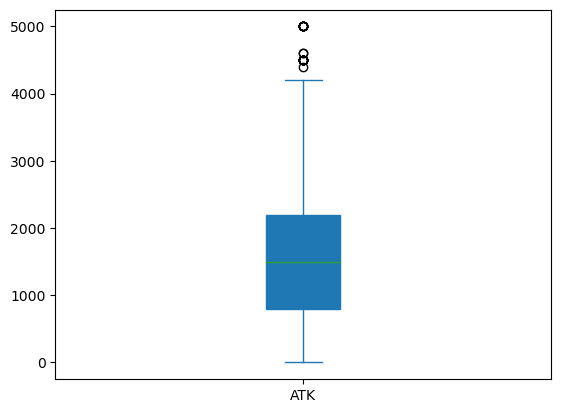

Primo quartile: 800.0
Terzo quartile: 2200.0
Massimo valore di attacco: 5000.0


In [180]:
atk = data["ATK"].dropna()
atk.plot.box(patch_artist=True)
plt.show()
#plt.savefig("atk.png", dpi=300, bbox_inches='tight', transparent=True)
print(f"Primo quartile: {atk.quantile(.25)}\nTerzo quartile: {atk.quantile(.75)}\nMassimo valore di attacco: {max(atk)}")

Notiamo come il 50% dei mostri si trova nella fascia dagli 800 ai 2200 punti di attacco, quindi in un range di 1400 punti

Nel range dai 2200 ai 5000 punti abbiamo il 25% dei mostri, come anche nel range da 0 a 800 punti, ma come densità ne abbiamo sicuramente di più nell'ultimo caso

Questo è dato dal fatto che le carte con elevatissimi valori di attacco sono più rare, visto che è una caratteristica così fondamentale del gioco

### Difesa

Come per l'attacco, anche la difesa è una componente fondamentale del gioco, poichè va a definire quanto una carta è resistente se attaccata da un'altra

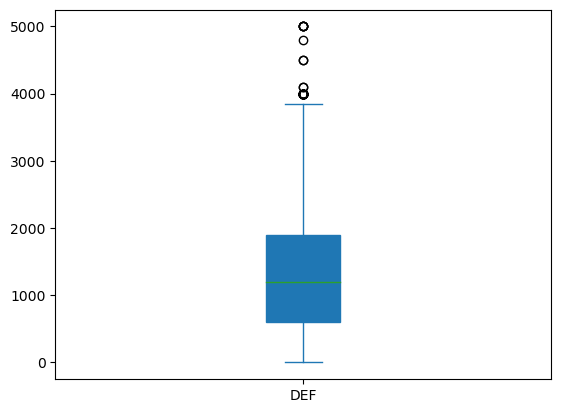

Primo quartile: 600.0
Terzo quartile: 1900.0
Massimo valore di attacco: 5000.0


In [183]:
def_ = data["DEF"].dropna()
def_.plot.box(patch_artist=True)
plt.show()
#plt.savefig("def.png", dpi=300, bbox_inches='tight', transparent=True)
print(f"Primo quartile: {def_.quantile(.25)}\nTerzo quartile: {def_.quantile(.75)}\nMassimo valore di attacco: {max(def_)}")

Notiamo come il 50% dei mostri si trova nella fascia dagli 600 ai 1900 punti di attacco, quindi in un range di 1300 punti

Nel range dai 1900 ai 5000 punti abbiamo il 25% dei mostri, come anche nel range da 0 a 600 punti, ma come densità ne abbiamo sicuramente di più nell'ultimo caso

Questo è dato dal fatto che le carte con elevatissimi valori di difesa sono ancora più rare delle carte con attacco elevato: infatti, una carta con attacco X che attacca una carta con difesa Y, con X < Y, non la distruggerà mai, e quindi per questo tipo di esigenza non sono state create molte carte con difesa elevatissima

Andiamo quindi a osservare i valori medi di attacco e difesa

In [185]:
atk.mean(), def_.mean()

(1488.790869833436, 1258.2321729002201)

Come ci aspettavamo, il valore medio dell'attacco è più alto rispetto al valore medio della difesa

### Confronto attacco e difesa

Vediamo un subplot che racchiude due istogrammi, uno per l'attacco e uno per la difesa

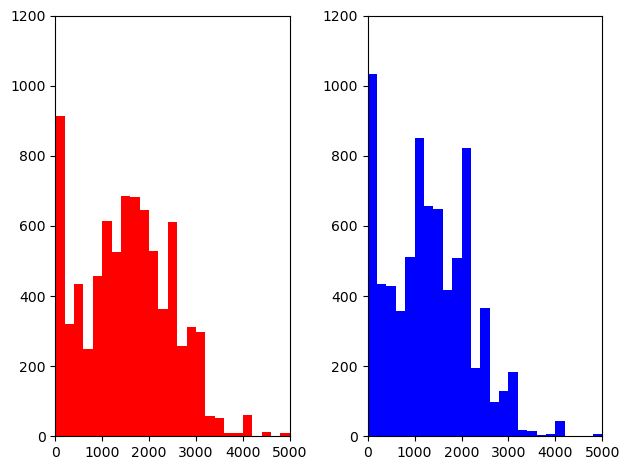

In [199]:
xmax = max(max(atk), max(def_))
ymax = 1200

plt.subplot(1,2,1)
plt.xlim(0,xmax)
plt.ylim(0,ymax)
plt.hist(atk, label="ATK", bins=25, color='red')

plt.subplot(1,2,2)
plt.xlim(0,xmax)
plt.ylim(0,ymax)
plt.hist(def_, label="DEF", bins=25, color='blue')

plt.tight_layout()
plt.show()
#plt.savefig("istogramma.png", dpi=300, bbox_inches='tight', transparent=True)

Come visto nelle analisi precedenti, vediamo come la concentrazione maggiore è tra i 1000 e i 2000 punti circa, con anche moltissime carte che hanno statistica 0 in una dei due campi

In [211]:
atk_def = data[["ATK", "DEF"]].dropna()

zero_atk = sum(atk_def["ATK"] == 0)
zero_def = sum(atk_def["DEF"] == 0)
all_zero = sum((atk_def["ATK"] == 0) & (atk_def["DEF"] == 0))

print(f"Attacco nullo: {zero_atk}, il {zero_atk * 100 / len(atk_def)}%")
print(f"Difesa nulla: {zero_def}, il {zero_def * 100 / len(atk_def)}%")
print(f"Entrambi nulli: {all_zero}, il {all_zero * 100 / len(atk_def)}%")

Attacco nullo: 665, il 8.606186100685907%
Difesa nulla: 819, il 10.599197618739485%
Entrambi nulli: 373, il 4.827229196324576%


### Prezzo

Per ogni venditore andiamo a vedere prezzo minimo, medio e massimo

Dobbiamo prima ad andare a escludere dei valori fastidiosi come 0 e 999.00, usati per indicare l'assenza di prezzo oppure un prezzo molto molto elevato, come nel caso di `Anotherverse Dragon`, che viene indicato con prezzo 999.99 ma viene venduto online a prezzi molto superiori

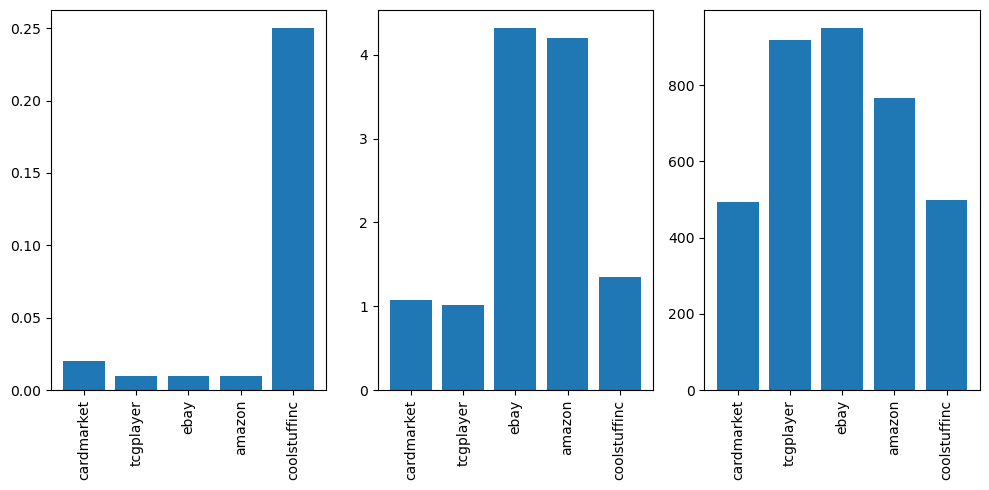

In [224]:
cardmarket = data["CARDMARKET_PRICE"].dropna().where(lambda x : x > 0).where(lambda x: x < 999.00)
tcgplayer = data["TCGPLAYER_PRICE"].dropna().where(lambda x : x > 0).where(lambda x: x < 999.00)
ebay = data["EBAY_PRICE"].dropna().where(lambda x : x > 0).where(lambda x: x < 999.00)
amazon = data["AMAZON_PRICE"].dropna().where(lambda x : x > 0).where(lambda x: x < 999.00)
coolstuffinc = data["COOLSTUFFINC_PRICE"].dropna().where(lambda x : x > 0).where(lambda x: x < 999.00)
stores = [
    cardmarket, tcgplayer, ebay, amazon, coolstuffinc
]
xticks = [
    "cardmarket", "tcgplayer", "ebay", "amazon", "coolstuffinc"
]

plt.subplot(1,3,1)
x = np.arange(0,len(stores))
y = [store.min() for store in stores]
plt.bar(x,y)
plt.xticks(x, xticks, rotation=90)
plt.subplot(1,3,2)
y = [store.mean() for store in stores]
plt.bar(x,y)
plt.xticks(x, xticks, rotation=90)
plt.subplot(1,3,3)
y = [store.max() for store in stores]
plt.bar(x,y)
plt.xticks(x, xticks, rotation=90)

plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()
#plt.savefig("price.png", dpi=300, bbox_inches='tight', transparent=True)

Analizziamo i singoli plot:
- prezzo minimo: il venditore `coolstuffinc` è quello con il prezzo minimo più alto, ben 25 volte il prezzo minimo che possiamo trovare negli altri venditori
- prezzo medio: il venditore `ebay` è quello con il prezzo medio più alto, ma rispetto a prima siamo più bassi come "moltiplicatore", con un valore che si sofferma poco oltre i 4 punti, rispetto al prezzo minimo della categoria
- prezzo massimo: il venditore `ebay` è quello con il prezzo medio più alto, con un fattore moltiplicativo inferiore al 2 rispetto al prezzo minimo della categoria